In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def clean_location(x):
    x = str(x).lower().strip()
    x = x.replace("  ", " ").replace(".", "").replace(",", "")
    if ("ca " in x) or (" ca" in x) or ("california" in x) or ("calif" in x):
        return "ca"
    return x
def clean_company(x):
    if "uber" in x:
        return "uber"
    return x

In [25]:
paths = ["indeed_uber_reviews.csv", "indeed_Uber-Drivers_reviews.csv", 
         "indeed_Ubereats_reviews.csv", "indeed_Lyft_reviews.csv", "indeed_Instacart_reviews.csv",
         "indeed_Grubhub_reviews.csv", "indeed_Doordash_reviews.csv"]
dataframes = []
for path in paths:
    _df = pd.read_csv(path)
    _df["company"] = path.split("_")[1].lower()
    dataframes.append(_df)
    
df = pd.concat(dataframes).drop_duplicates().set_index("id").drop(["url", "language"], axis=1)

df["datetime"] = pd.to_datetime(df["datetime"])
# create year and month columns
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df["state"] = df["state"].apply(clean_location)
df["company"] = df["company"].apply(clean_company)
df = df[ (df["year"] > 2017) & (df["year"] < 2023)]

In [26]:
state_filter = ["ca", "san francisco", "nuevo león", "san jose", "san diego", "fresno",
                "southern calif", "sacramento", "los angeles", "san francisco bay area", "bay area",
                "san diego", "orange county", "paso robles", "glendale"] # we want to pick reviews that have either of these in the "state" column

df = df[df["state"].isin(state_filter)] # filter out reviews that don't have any of the above in the "state" column
df.to_csv("indeed_reviews_ca.csv", index=True)

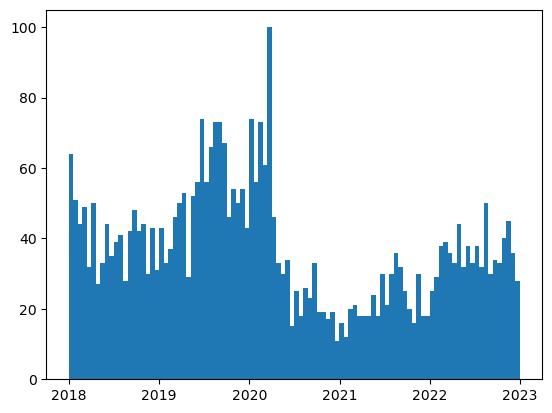

In [27]:
df.to_csv("indeed_reviews.csv")
plt.hist(df["datetime"], bins=100)
plt.show()

In [ ]:
## archive

In [19]:
for i in df["state"].unique():
    if type(i) == str:
        if i not in state_filter and len(i) > 2 and "ca" in i:
            print(i)

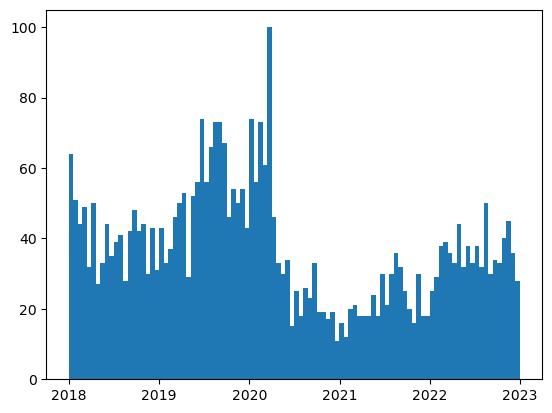